# Heart Disease Prediction Data Analyis

### Task 1: Import Libraries

In [1606]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import uniform as sp_uniform   
from scipy.stats import randint as sp_randint
import shap 
from sklearn.ensemble import RandomForestClassifier, StackingClassifier,BaggingClassifier ,GradientBoostingClassifier
import xgboost as xgb 
import catboost as cbt 
from sklearn import svm 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,accuracy_score
from scipy import stats
import statsmodels.api as sm

from sklearn.utils.multiclass import unique_labels
from sklearn.feature_selection import f_regression, SelectKBest, f_classif

import warnings 
warnings.filterwarnings('ignore')

import os
import sys

### Task 2: Load the Heart Disease Dataset 

In [1607]:
# Load the data
train = pd.read_csv('Train Dataset .csv')
test = pd.read_csv('Test Dataset.csv')
sample = pd.read_csv('Sample Submission.csv')

In [1608]:
print(train.shape) 
print(test.shape)

(7303, 15)
(2697, 14)


### Data Assesment/Investigation

In [1609]:
# Display the first five rows
train.head()

# Print the number of rows and columns, and column names
print(train.shape, train.columns)

# Count the number of missing values
print(train.isna().sum())


(7303, 15) Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [1610]:
test.head()

# Print the number of rows and columns, and column names
print(test.shape, test.columns)

# Count the number of missing values
print(test.isna().sum())

(2697, 14) Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [1611]:
train=train.rename({'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 
                     'chol':'serum_cholesterol', 'fbs':'fasting_blood_sugar', 'restecg':'resting_electro_results',
                     'thalach':'max_heart_rate_ach', 'exang':'exercise_induce_angina', 
                      'slope':'slope_of_peak_exercise', 'ca':'number_major_vessels' },axis=1)

In [1612]:
test=test.rename({'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure', 
                     'chol':'serum_cholesterol', 'fbs':'fasting_blood_sugar', 'restecg':'resting_electro_results',
                     'thalach':'max_heart_rate_ach', 'exang':'exercise_induce_angina', 
                      'slope':'slope_of_peak_exercise', 'ca':'number_major_vessels' },axis=1)

In [1613]:
train.dtypes 

Id                           int64
Age                          int64
Sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
serum_cholesterol            int64
fasting_blood_sugar          int64
resting_electro_results      int64
max_heart_rate_ach           int64
exercise_induce_angina       int64
oldpeak                    float64
slope_of_peak_exercise       int64
number_major_vessels         int64
thal                         int64
target                       int64
dtype: object

In [1614]:
test.dtypes 

id                           int64
age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
serum_cholesterol            int64
fasting_blood_sugar          int64
resting_electro_results      int64
max_heart_rate_ach           int64
exercise_induce_angina       int64
oldpeak                    float64
slope_of_peak_exercise       int64
number_major_vessels         int64
thal                         int64
dtype: object

##### Display the train/test first five observations

In [1615]:
train.head()

,Id,Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electro_results,max_heart_rate_ach,exercise_induce_angina,oldpeak,slope_of_peak_exercise,number_major_vessels,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [1616]:
test.head()

,id,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electro_results,max_heart_rate_ach,exercise_induce_angina,oldpeak,slope_of_peak_exercise,number_major_vessels,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


##### Investigate Ordinal and Norminal categorical variables 

In [1617]:
print(train['Sex'].unique())

print(train['chest_pain_type'].unique())

print(train['fasting_blood_sugar'].unique())

print(train['resting_electro_results'].unique())

print(train['exercise_induce_angina'].unique())

print(train['slope_of_peak_exercise'].unique())

print(train['number_major_vessels'].unique())

print(train['thal'].unique())

print(train['target'].unique())

[0 1]
[1 2 0 3]
[1 0]
[0 1 2]
[0 1]
[1 2 0]
[4 1 3 2 0]
[1 0 2 3]
[1 0]


##### Investigate the descriptive statistics of numerical variables

In [1618]:

# Summary statistics
train.describe() 

,Id,Age,Sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electro_results,max_heart_rate_ach,exercise_induce_angina,oldpeak,slope_of_peak_exercise,number_major_vessels,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1619]:

# Summary statistics
test.describe() 

,id,age,sex,chest_pain_type,resting_blood_pressure,serum_cholesterol,fasting_blood_sugar,resting_electro_results,max_heart_rate_ach,exercise_induce_angina,oldpeak,slope_of_peak_exercise,number_major_vessels,thal
count,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000,2697.000000
mean,14939.832036,53.064516,0.488691,1.504264,146.384872,344.027809,0.497219,1.021135,135.993326,0.484613,3.142714,1.011494,2.032258,1.473489
std,2888.940621,14.350978,0.499965,1.112747,30.640580,127.265038,0.500085,0.811590,38.419913,0.499856,1.810003,0.814976,1.397353,1.120744
min,10000.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12455.000000,41.000000,0.000000,1.000000,121.000000,233.000000,0.000000,0.000000,103.000000,0.000000,1.600000,0.000000,1.000000,0.000000
50%,14854.000000,53.000000,0.000000,1.000000,147.000000,344.000000,0.000000,1.000000,136.000000,0.000000,3.200000,1.000000,2.000000,1.000000
75%,17465.000000,66.000000,1.000000,3.000000,172.000000,455.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000
max,19999.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


##### Investigate Duplicate data 

In [1620]:
print(train.duplicated().sum())

print(test.duplicated().sum())

0
0


##### Data Quality Issues
- Some variables are not properly descriptive
- Wrong data types

### Data Preprocessing/Cleaning

In [1621]:
train=train.drop(columns=['Id'],axis=1)
#test=test.drop(columns=['id'],axis=1)

In [1622]:
train.to_csv('train_df.csv')
test.to_csv('test_df.csv')

In [1623]:
columns=['chest_pain_type','fasting_blood_sugar','resting_electro_results','exercise_induce_angina',
         'slope_of_peak_exercise','number_major_vessels','thal','target']

columns2=['chest_pain_type','fasting_blood_sugar','resting_electro_results','exercise_induce_angina',
         'slope_of_peak_exercise','number_major_vessels','thal']

for col in columns:
    train[col]= train[col].astype('category')


for col in columns2:
    test[col]= test[col].astype('category')

In [1624]:
train.dtypes 

Age                           int64
Sex                           int64
chest_pain_type            category
resting_blood_pressure        int64
serum_cholesterol             int64
fasting_blood_sugar        category
resting_electro_results    category
max_heart_rate_ach            int64
exercise_induce_angina     category
oldpeak                     float64
slope_of_peak_exercise     category
number_major_vessels       category
thal                       category
target                     category
dtype: object

In [1625]:
test.dtypes 

id                            int64
age                           int64
sex                           int64
chest_pain_type            category
resting_blood_pressure        int64
serum_cholesterol             int64
fasting_blood_sugar        category
resting_electro_results    category
max_heart_rate_ach            int64
exercise_induce_angina     category
oldpeak                     float64
slope_of_peak_exercise     category
number_major_vessels       category
thal                       category
dtype: object

In [1626]:
train=train.rename({'Age':'age','Sex':'sex'},axis=1)

In [1627]:
train.select_dtypes(include=['int64','float64']).columns 

Index(['age', 'sex', 'resting_blood_pressure', 'serum_cholesterol',
       'max_heart_rate_ach', 'oldpeak'],
      dtype='object')

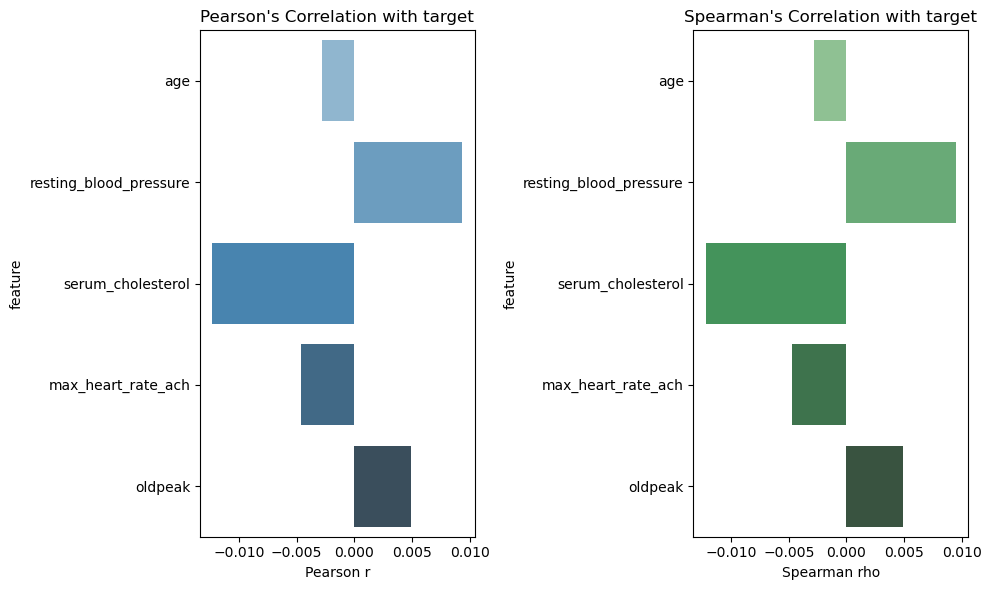

,feature,Pearson r,Spearman rho
0,age,-0.002846,-0.002775
1,resting_blood_pressure,0.009320,0.009463
2,serum_cholesterol,-0.012291,-0.012177
3,max_heart_rate_ach,-0.004634,-0.004713
4,oldpeak,0.004899,0.004889


In [1628]:
def correlations(train, y, xs):
    """
    Computes Pearsons and Spearman correlation coefficient.
    Parameters
    ----------
    data: Pandas Data Frame
    y: Target/Dependent variable - has to be python string object
    xs: Features/Independent variables - python list of string objects
    Returns
    ------
    df: Pandas Data Frame Object
    """
    if train is None:
        raise ValueError(
            "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    if (y is None) or (xs is None):
        raise ValueError(
            "The parameter `y` or `xs` has to be non-nil reference")
    if not isinstance(train, pd.DataFrame):
        raise ValueError("`data` - has to be Pandas DataFrame object")
    if not isinstance(y, str):
        raise ValueError("`data` - has to be Python string object")
    if not isinstance(xs, list):
        raise ValueError("`xs` - has to be Python list object")

    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(train[y], train[x])[0]
        rs.append(r)
        rho = stats.spearmanr(train[y], train[x])[0]
        rhos.append(rho)
    

    # Create DataFrame for the results
    result_df = pd.DataFrame({"feature": xs, "Pearson r": rs, "Spearman rho": rhos})
    
    # Plotting Pearson and Spearman correlations
    plt.figure(figsize=(10, 6))
    
    # Plot Pearson's correlation
    plt.subplot(1, 2, 1)
    sns.barplot(x="Pearson r", y="feature", data=result_df, palette="Blues_d")
    plt.title(f"Pearson's Correlation with {y}")
    
    # Plot Spearman's correlation
    plt.subplot(1, 2, 2)
    sns.barplot(x="Spearman rho", y="feature", data=result_df, palette="Greens_d")
    plt.title(f"Spearman's Correlation with {y}")
    
    plt.tight_layout()
    plt.show()

    return result_df

y= 'target'
xs= ['age', 'resting_blood_pressure', 'serum_cholesterol',
       'max_heart_rate_ach', 'oldpeak']


correlations(train, y, xs)

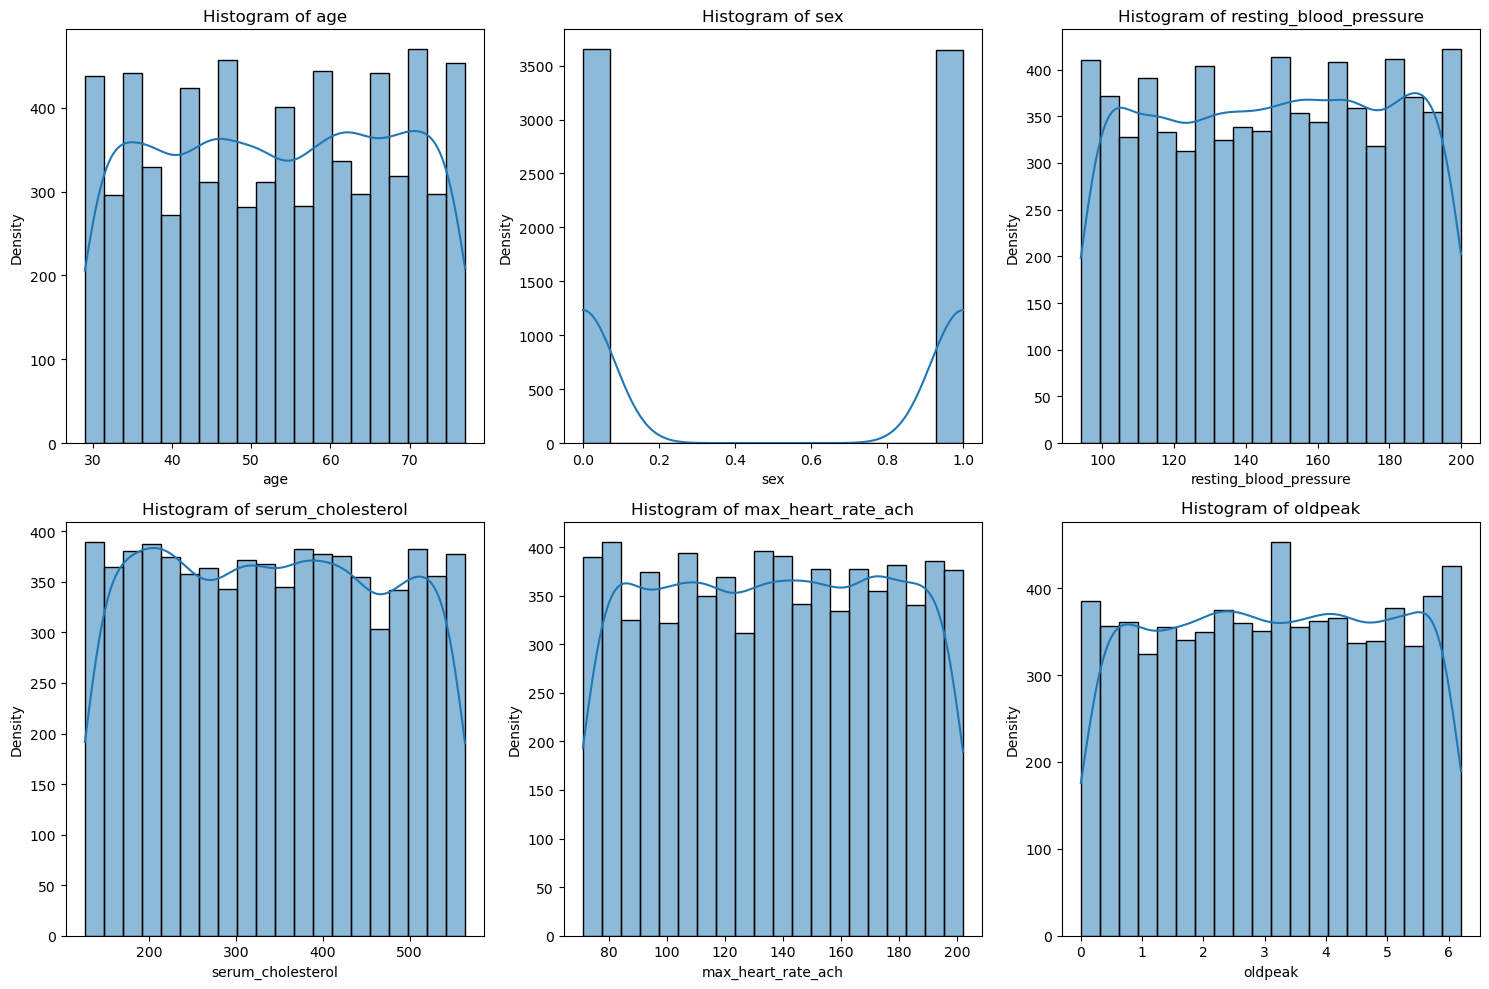

In [1629]:


def hist_plot(train, col_name, ax, title=None, xlabel=None, ylabel='Density'):
    """
    Plot's histogram for a given column on a specific axis.
    Parameters
    ----------
    train : Pandas DataFrame
    col_name : Column name in data frame
    ax : Matplotlib axis to plot on
    title : Plot title
    xlabel : X-axis label
    ylabel : Y-axis label
    """
    sns.histplot(train[col_name], ax=ax, kde=True)  # Use seaborn plot with KDE
    if not title:
        title = f'Histogram of {col_name}'
    ax.set_title(title)  # Set plot title
    if not xlabel:
        xlabel = col_name
    ax.set_xlabel(xlabel)  # Set text for the x axis
    ax.set_ylabel(ylabel)  # Set text for y axis

def plot_all_numerical(train, n_cols=3):
    """
    Plot histograms for all numerical columns in the dataset in a grid.
    Parameters
    ----------
    train : Pandas DataFrame
    n_cols : Number of columns per row in the grid
    """
    # Select numerical columns
    num_cols = train.select_dtypes(include=['int64', 'float64']).columns
    
    # Number of plots required
    n_plots = len(num_cols)
    
    # Define the number of rows needed based on number of columns per row (n_cols)
    n_rows = (n_plots + n_cols - 1) // n_cols  # Ceiling division
    
    # Create subplots with a grid (n_rows x n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Loop through each numerical column and plot the histogram
    for i, col in enumerate(num_cols):
        hist_plot(train, col, ax=axes[i])
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_all_numerical(train, n_cols=3);  # Plot with 3 columns per row


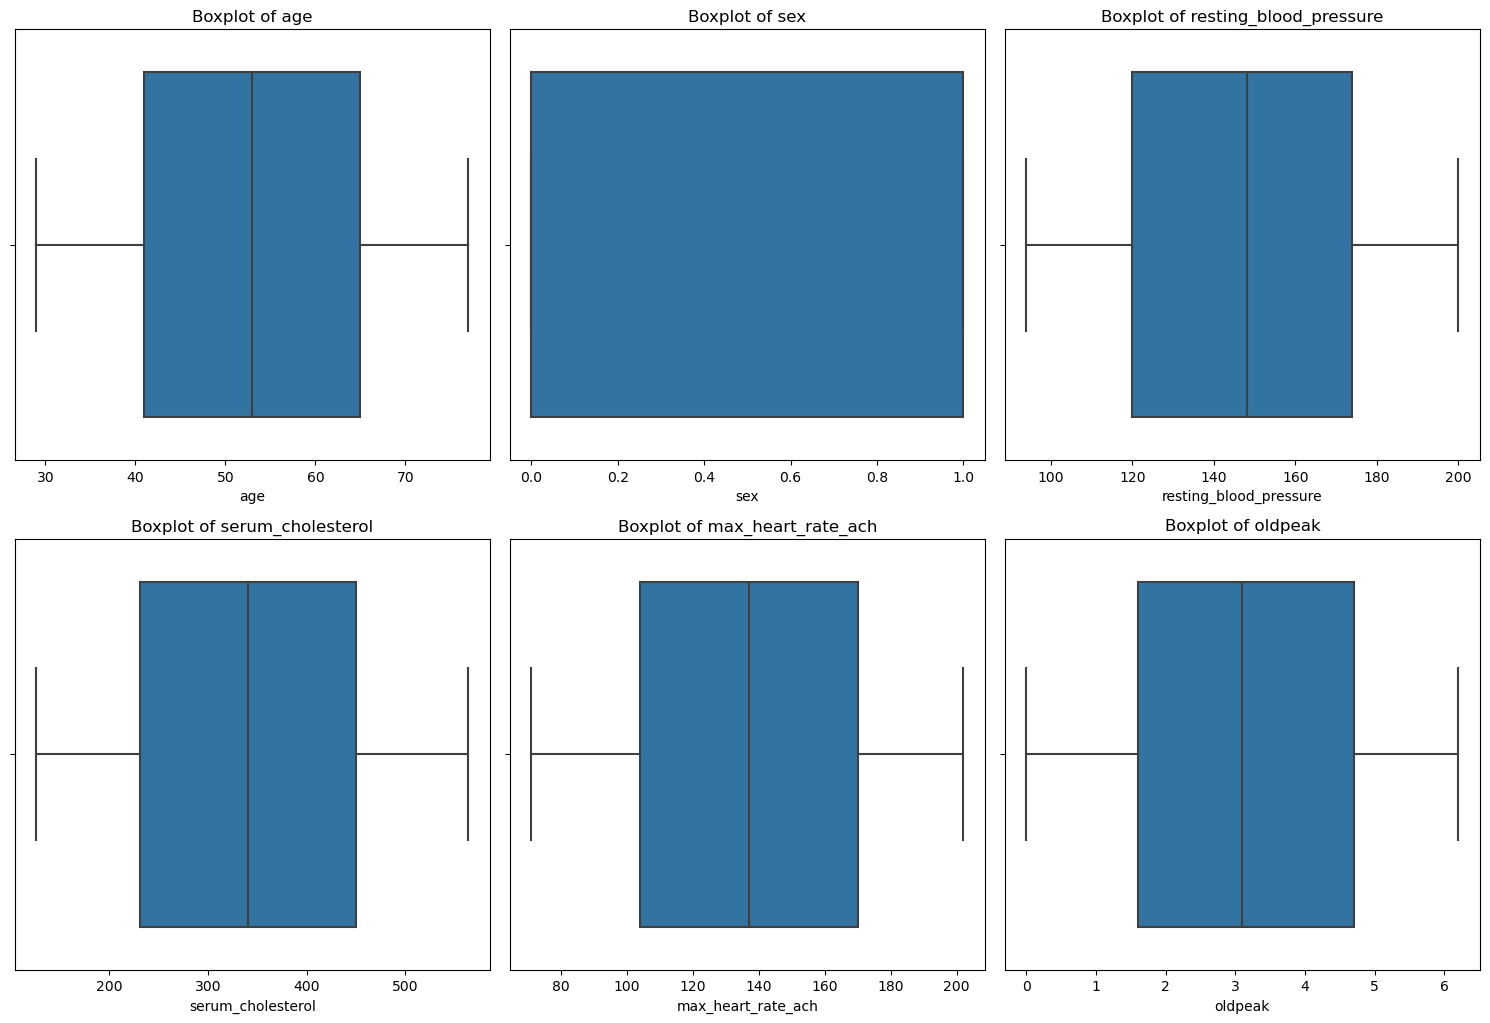

In [1630]:
def box_plot(train, col_name, ax, title=None, xlabel=None, ylabel=None):
    """
    Draw a single horizontal boxplot on the given axis.
    Parameters
    ----------
    df : Pandas DataFrame
    col_name : Column name in data frame
    ax : Matplotlib axis to plot on
    title : Plot title
    xlabel : X-axis label
    ylabel : Y-axis label
    """
    sns.boxplot(x=train[col_name], ax=ax)  # Use seaborn box plot on the given axis
    if not title:
        title = f'Boxplot of {col_name}'
    ax.set_title(title)  # Set the plot title
    if xlabel:
        ax.set_xlabel(xlabel)  # Set x-axis label if provided
    if ylabel:
        ax.set_ylabel(ylabel)  # Set y-axis label if provided

def plot_box(train, n_cols=3, n_rows=3):
    """
    Plot box plots for all numerica columns in the dataset in a grid.
    Parameters
    ----------
    df : Pandas DataFrame
    n_cols : Number of columns per row in the grid (default: 3)
    n_rows : Number of rows in the grid (default: 3)
    """
    # Select numerical columns
    cat_cols = train.select_dtypes(include=['int64','float64']).columns
    
    # Total number of plots required
    n_plots = len(cat_cols)
    
    # Create subplots with a grid (n_rows x n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Loop through each numerical column and plot the boxplot
    for i, col in enumerate(cat_cols):
        box_plot(train, col, ax=axes[i])
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_box(train, n_cols=3, n_rows=3)  # Adjust the rows and cols as needed


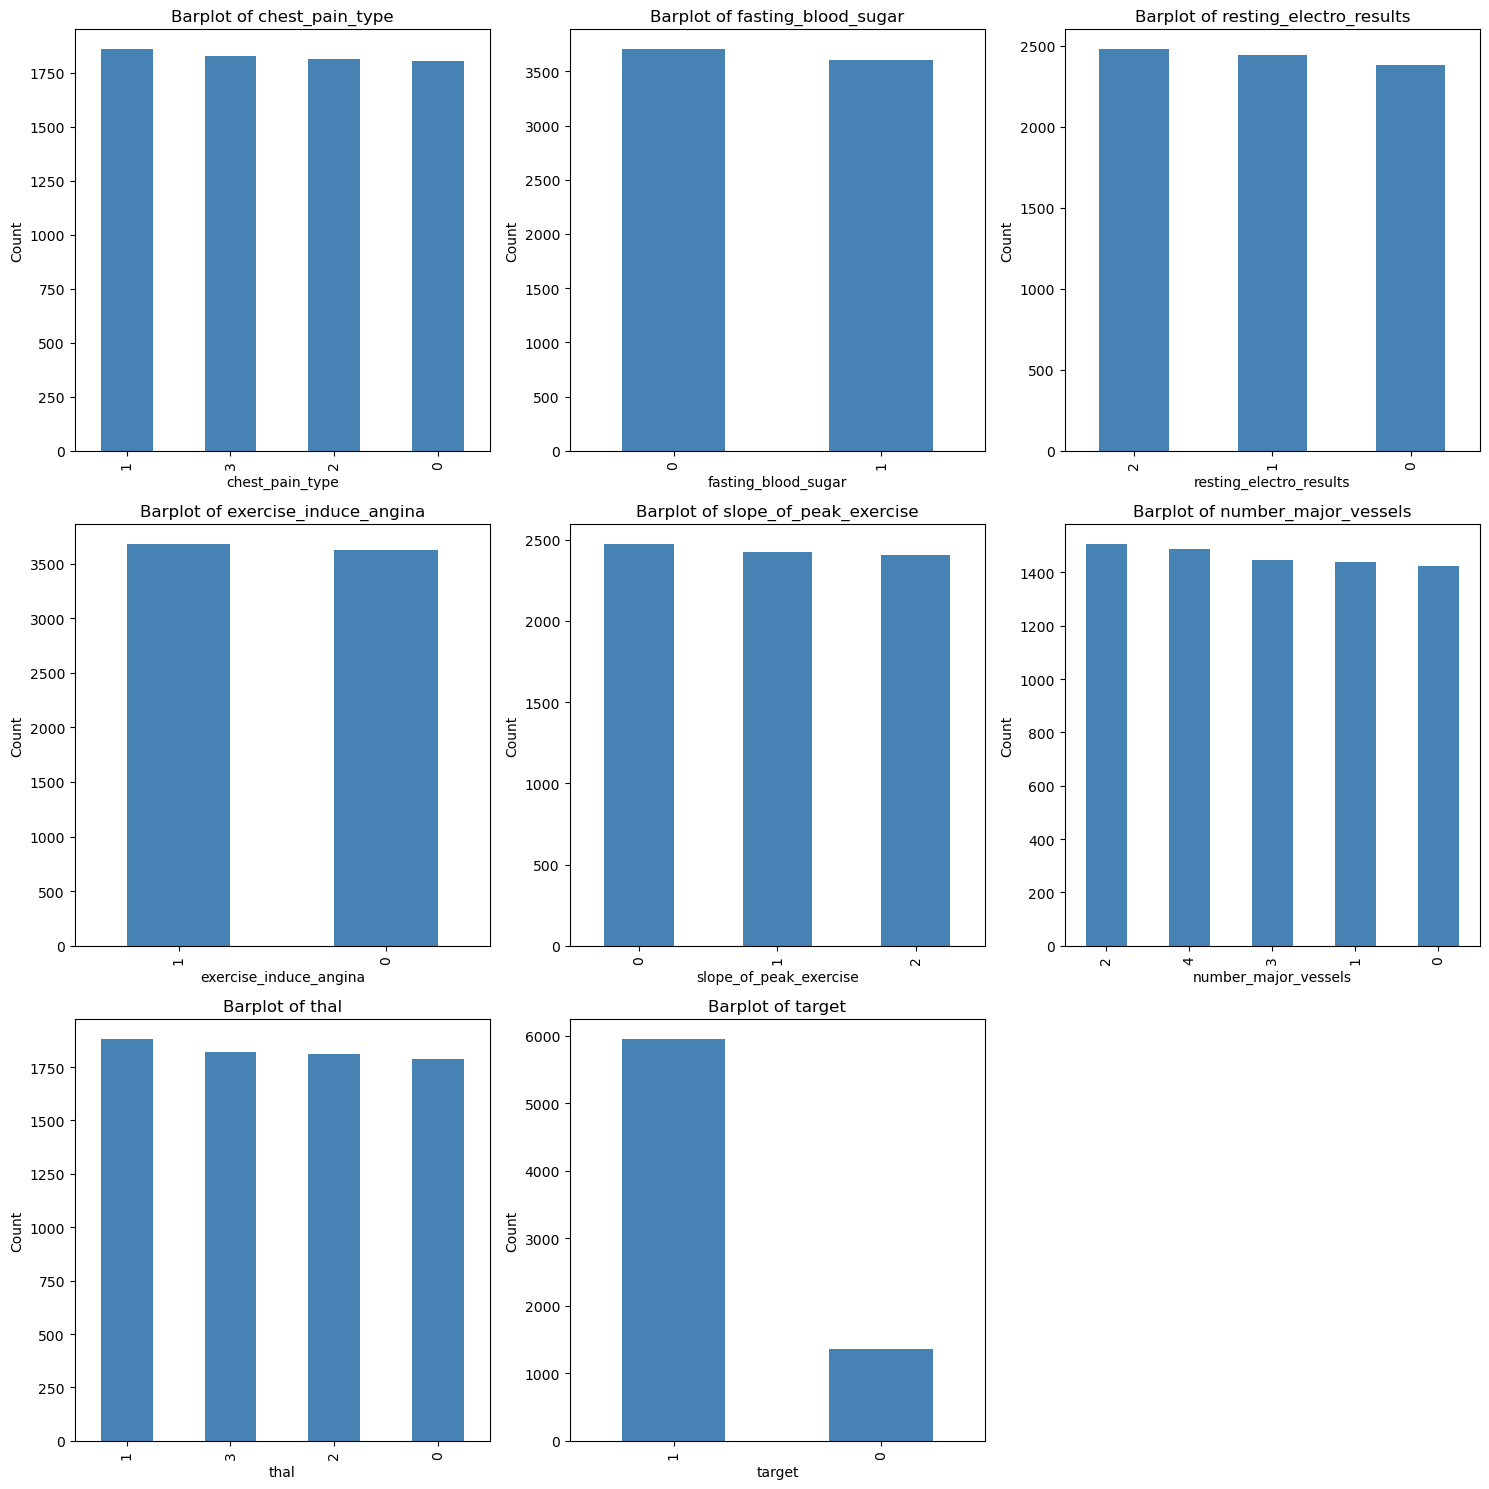

In [1631]:

def bar_plot(train, col_name, ax, title=None, xlabel=None, ylabel='Count'):
    """
    Draws a single bar plot on the given axis.
    Parameters
    ----------
    df : Pandas DataFrame
    col_name : Column name in data frame
    ax : Matplotlib axis to plot on
    title : Plot title
    xlabel : X-axis label
    ylabel : Y-axis label
    """
    value_counts = train[col_name].value_counts()
    value_counts.plot(kind='bar', color='steelblue', ax=ax)  # Bar plot on specific axis
    
    if not title:
        title = f'Barplot of {col_name}'
    ax.set_title(title)  # Set the plot title
    if xlabel:
        ax.set_xlabel(xlabel)  # Set x-axis label if provided
    ax.set_ylabel(ylabel)  # Set y-axis label

def plot_all_categorical_bar(train, n_cols=3):
    """
    Plot bar plots for all categorical columns in the dataset in a grid.
    Parameters
    ----------
    df : Pandas DataFrame
    n_cols : Number of columns per row in the grid (default: 3)
    """
    # Select categorical columns
    cat_cols = train.select_dtypes(include=['category', 'object']).columns
    
    # Calculate number of rows based on the number of categorical columns
    n_rows = (len(cat_cols) + n_cols - 1) // n_cols  # ceil division for rows
    
    # Create subplots with a grid (n_rows x n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Loop through each categorical column and plot the bar plot
    for i, col in enumerate(cat_cols):
        bar_plot(train, col, ax=axes[i])
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_all_categorical_bar(train, n_cols=3)  # Adjust the number of columns per row as needed


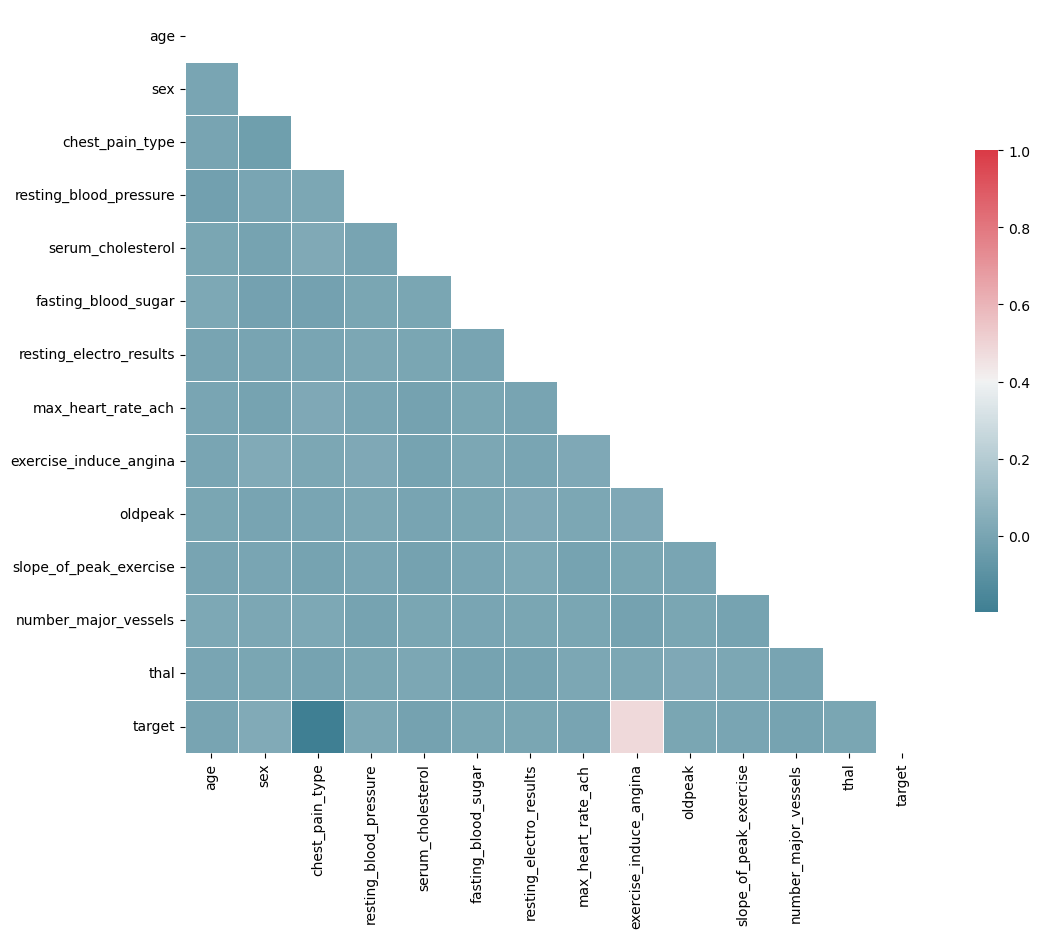

In [1632]:
def plot_correlation_heatmap(data=None, vmax=1, annot=True, corr_type='pearson', figsize=(12, 12)):
    """
    Plots correlations on a heatmap
    """
    if data is None:
        raise ValueError(
            "The parameter 'data' must be assigned a non-nil reference to a Pandas DataFrame")
    # Compute the correlation matrix
    corr = data.corr(corr_type)
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    fig, axes = plt.subplots(figsize=figsize)
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=vmax, annot=annot, square=True,
                linewidths=.5, cbar_kws={"shrink": .5}, ax=axes)
    plt.show()
    plt.close()

plot_correlation_heatmap(data=train, vmax=1, annot=True, corr_type='pearson', figsize=(12, 12))

In [1633]:
def get_quantiles(df, cols):
    """
    Returns quantiles 1%, 25%, 50%, 75%, 95%, and 99% for specified columns.
    
    Parameters
    ----------
    df : Pandas DataFrame
        Data for which quantiles are to be calculated.
    cols : list of str
        List of column names for which quantiles are to be calculated.
    
    Returns
    -------
    pd.DataFrame
        DataFrame with quantiles for each specified column.
    """
    # Initialize an empty dictionary to store quantiles
    quantiles_dict = {}
    
    # Calculate quantiles for each column
    for col in cols:
        # Get quantiles for the current column
        col_quant = df[col].quantile(q=[.01, .25, .5, .75, .95, .99])
        # Convert to DataFrame and transpose for better readability
        quantiles_dict[col] = col_quant

    # Convert dictionary to DataFrame
    quantiles_df = pd.DataFrame(quantiles_dict)
    
    return quantiles_df


cols = ['age', 'resting_blood_pressure', 'serum_cholesterol', 'max_heart_rate_ach', 'oldpeak']
quantiles = get_quantiles(train, cols)
print(quantiles)


       age  resting_blood_pressure  serum_cholesterol  max_heart_rate_ach  \
0.01  29.0                    94.0              129.0                72.0   
0.25  41.0                   120.0              231.0               104.0   
0.50  53.0                   148.0              341.0               137.0   
0.75  65.0                   174.0              450.0               170.0   
0.95  75.0                   195.0              543.9               196.0   
0.99  77.0                   199.0              560.0               201.0   

      oldpeak  
0.01      0.1  
0.25      1.6  
0.50      3.1  
0.75      4.7  
0.95      5.9  
0.99      6.1  


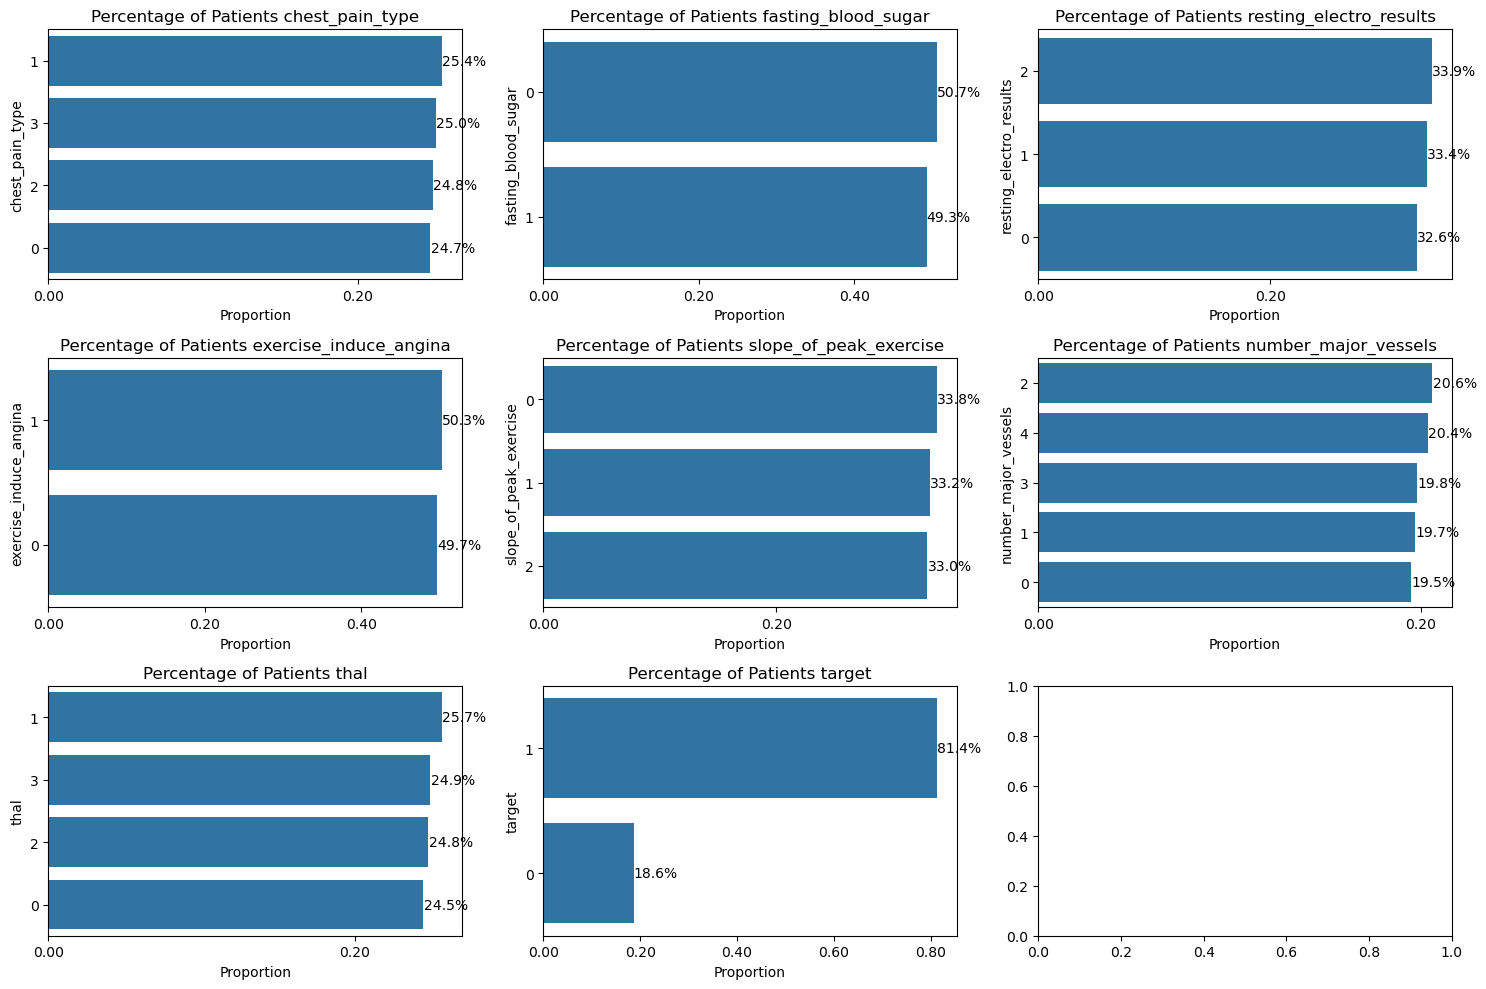

In [1634]:


# List of columns you want to plot
columns = ['chest_pain_type', 'fasting_blood_sugar', 'resting_electro_results',
           'exercise_induce_angina', 'slope_of_peak_exercise',
           'number_major_vessels', 'thal', 'target']

def plot_perct(train, n_rows, n_cols):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))  # Create subplots
    axes = axes.flatten()  # Flatten the axes to easily iterate through them
    
    for i, col in enumerate(columns):
        ax = axes[i]  # Get the current subplot axis
        n_loan = train[col].value_counts().sum()  # Total count of column
        max_loan_count = train[col].value_counts().iloc[0]  # Count of the most frequent value
        max_loan_prop = max_loan_count / n_loan  # Proportion of the most frequent value
        
        # Create tick marks for x-axis
        tick_props = np.arange(0, max_loan_prop, 0.20)
        tick_name = ['{:0.2f}'.format(v) for v in tick_props]
        
        base_color = sns.color_palette()[0]
        type_order = train[col].value_counts().index
        
        # Create count plot
        sns.countplot(data=train, y=col, color=base_color, order=type_order, ax=ax)
        
        # Set x-ticks
        ax.set_xticks(tick_props * n_loan)
        ax.set_xticklabels(tick_name)
        ax.set_title(f'Percentage of Patients {col}', fontsize=12)
        
        # Annotate each bar with the percentage
        for j, value in enumerate(train[col].value_counts()):
            pct_string = '{:0.1f}%'.format(100 * value / n_loan)
            ax.text(value + 1, j, pct_string, va='center')
        
        ax.set_xlabel('Proportion')

    plt.tight_layout()  # Adjust layout so the plots don't overlap
    plt.show()

plot_perct(train, 3, 3)


In [1635]:
train.select_dtypes(include=['category']).columns

Index(['chest_pain_type', 'fasting_blood_sugar', 'resting_electro_results',
       'exercise_induce_angina', 'slope_of_peak_exercise',
       'number_major_vessels', 'thal', 'target'],
      dtype='object')

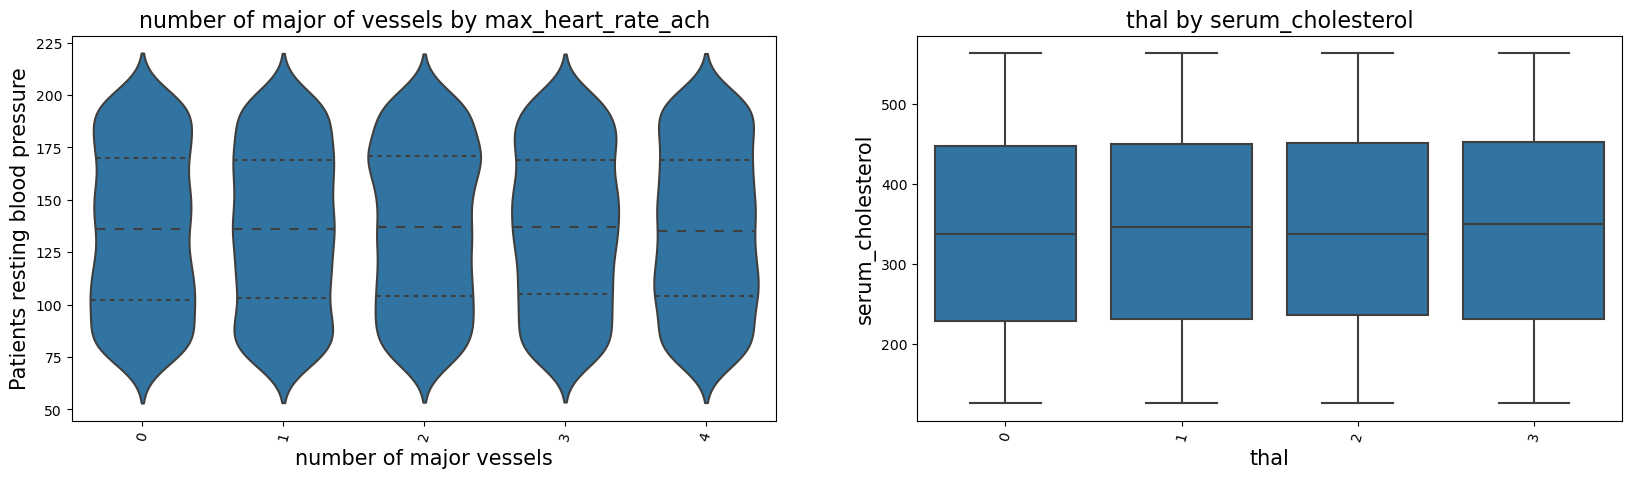

In [1636]:
plt.figure(figsize=[20,5])
base_color=sns.color_palette()[0]

plt.subplot(1,2,1)
sns.violinplot(data=train, x='number_major_vessels', y='max_heart_rate_ach', inner='quartile', color=base_color)
plt.xticks(rotation=75)
plt.xlabel('number of major vessels',fontsize=15)
plt.ylabel('Patients resting blood pressure', fontsize=15)
plt.title('number of major of vessels by max_heart_rate_ach', fontsize=16)

plt.subplot(1,2,2)
sns.boxplot(data=train, x='thal', y='serum_cholesterol',color=base_color)
plt.xticks(rotation=75)
plt.ylabel('serum_cholesterol', fontsize=15)
plt.xlabel('thal',fontsize=15)
plt.title('thal by serum_cholesterol', fontsize=16);

In [1637]:
train['target'].unique()

[1, 0]
Categories (2, int64): [0, 1]

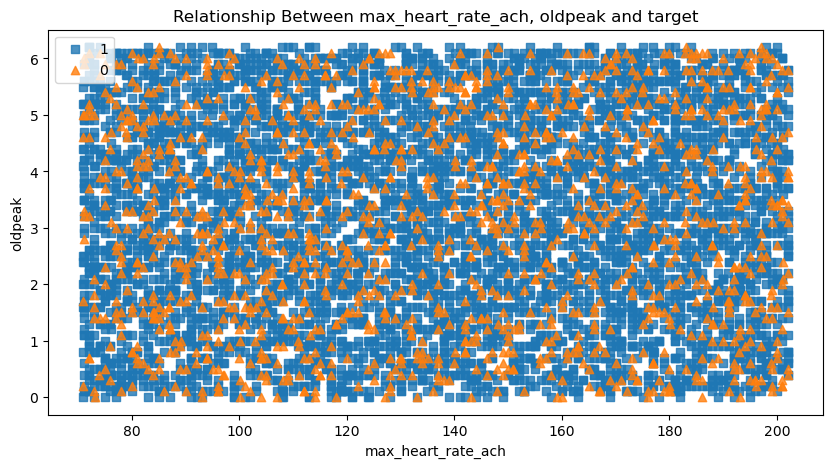

In [1638]:
#LoanStatus MonthlyIncome Amountof_Loan
#np.random.seed(2018)
plt.figure(figsize=[10,5])
two_status_df=train[train['target'].isin([1,0])]
heart_identifiers=[[1,'s'],[0,'^']]

for ltype, markers in heart_identifiers:
    heart_df=two_status_df[two_status_df['target']==ltype]
    sns.regplot(data=heart_df, x='max_heart_rate_ach', y='oldpeak', x_jitter=0.04, fit_reg=False, marker=markers)
plt.xlabel('max_heart_rate_ach')
plt.ylabel('oldpeak')
plt.title('Relationship Between max_heart_rate_ach, oldpeak and target')
plt.legend([1,0]);

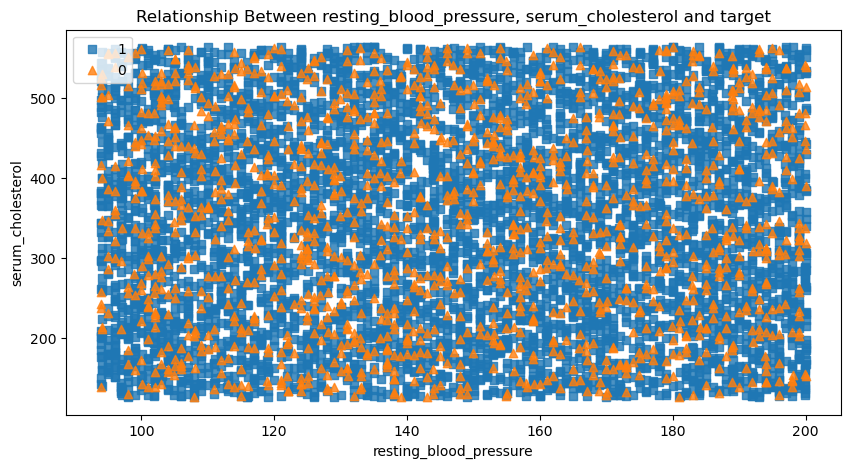

In [1639]:
#LoanStatus MonthlyIncome Amountof_Loan
#np.random.seed(2018)
plt.figure(figsize=[10,5])
two_status_df=train[train['target'].isin([1,0])]
heart_identifiers=[[1,'s'],[0,'^']]

for ltype, markers in heart_identifiers:
    heart_df=two_status_df[two_status_df['target']==ltype]
    sns.regplot(data=heart_df, x='resting_blood_pressure', y='serum_cholesterol', x_jitter=0.04, fit_reg=False, marker=markers)
plt.xlabel('resting_blood_pressure')
plt.ylabel('serum_cholesterol')
plt.title('Relationship Between resting_blood_pressure, serum_cholesterol and target')
plt.legend([1,0]);

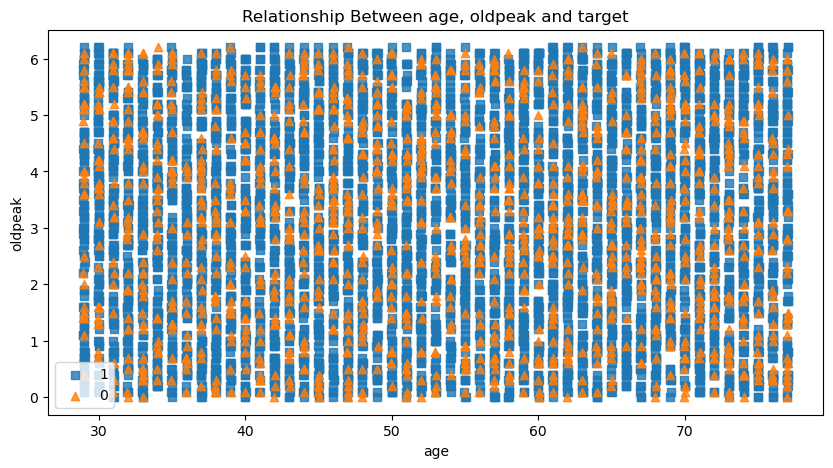

In [1640]:
#LoanStatus MonthlyIncome Amountof_Loan
#np.random.seed(2018)
plt.figure(figsize=[10,5])
two_status_df=train[train['target'].isin([1,0])]
heart_identifiers=[[1,'s'],[0,'^']]

for ltype, markers in heart_identifiers:
    heart_df=two_status_df[two_status_df['target']==ltype]
    sns.regplot(data=heart_df, x='age', y='oldpeak', x_jitter=0.04, fit_reg=False, marker=markers)
plt.xlabel('age')
plt.ylabel('oldpeak')
plt.title('Relationship Between age, oldpeak and target')
plt.legend([1,0]);

In [1641]:
train.select_dtypes(include=['int64','float64']).columns

Index(['age', 'sex', 'resting_blood_pressure', 'serum_cholesterol',
       'max_heart_rate_ach', 'oldpeak'],
      dtype='object')

In [1642]:
train.select_dtypes(include=['category']).columns

Index(['chest_pain_type', 'fasting_blood_sugar', 'resting_electro_results',
       'exercise_induce_angina', 'slope_of_peak_exercise',
       'number_major_vessels', 'thal', 'target'],
      dtype='object')

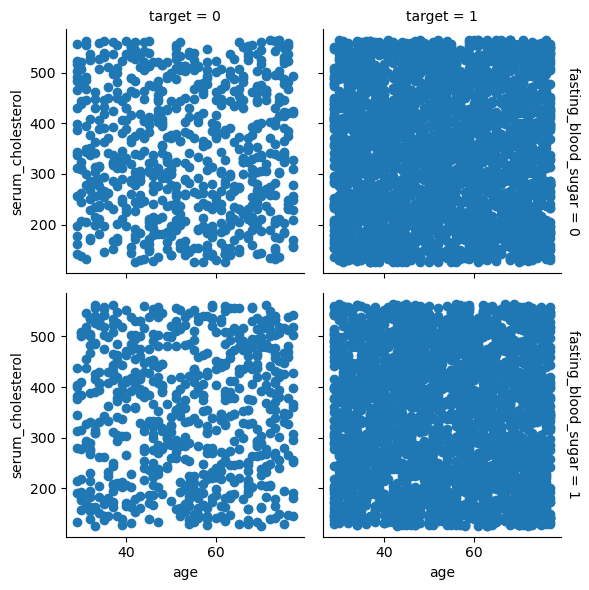

In [1643]:
def Facet_status():
    Loan_status=train[train['target'].isin([1,0])]
    g=sns.FacetGrid(data=train, col='target', row='fasting_blood_sugar', margin_titles=True)
    g.map(plt.scatter, 'age','serum_cholesterol')
Facet_status()
    

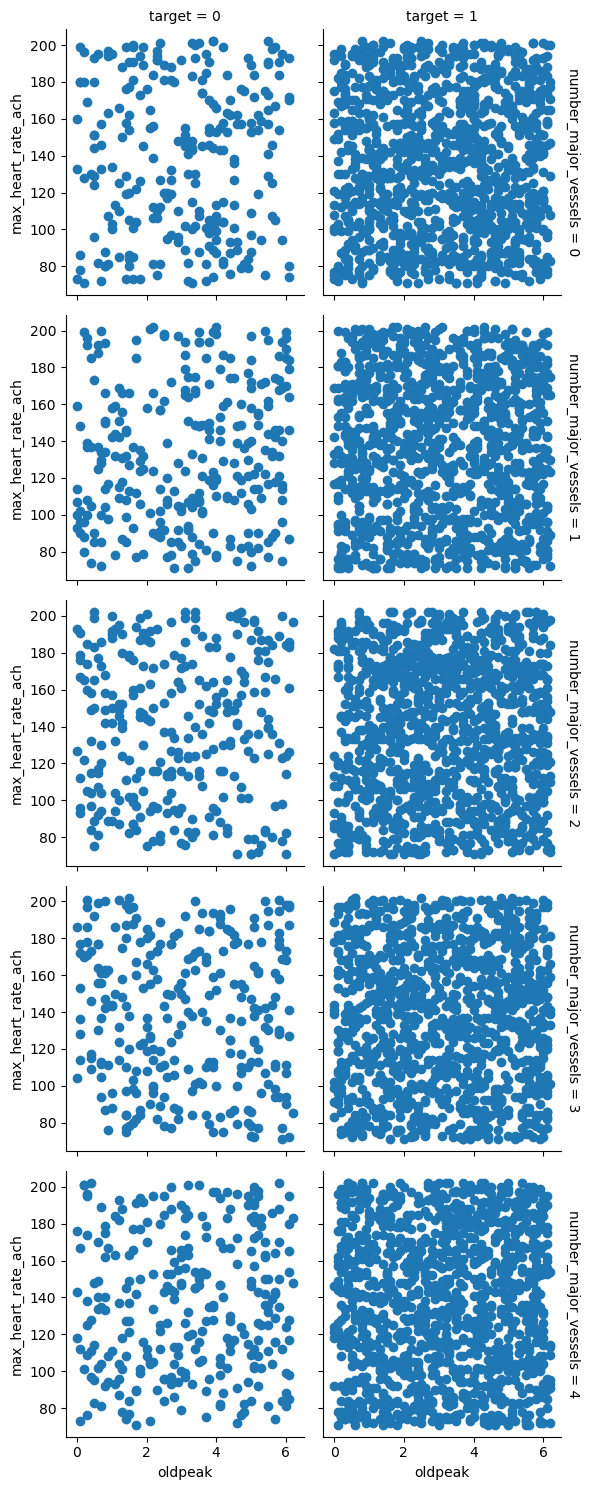

In [1644]:
def Facet_status():
    Loan_status=train[train['target'].isin([1,0])]
    g=sns.FacetGrid(data=train, col='target', row='number_major_vessels', margin_titles=True)
    g.map(plt.scatter, 'oldpeak','max_heart_rate_ach')
Facet_status()
    